This Jupyter Notebook file is a template for 2D kinematics calculation.

It assumes we have time, position, velocity and acceleration data in tables (Python lists) and performs approximate calculations. 

"Definitions" section contains definitions of methods for kinematics calculations. Students of the "Engineering Physics" course don't have to understand the details because it uses some "advanced" Python knowledge.

"Examples" section shows examples of how to use these routines. This part assumes only basic Python knowledge, an understanding of the concepts of kinematics and intelligent usage of the functions defined in the "Definitios" section.

In [1]:
# importing modules
import math   # math functions
import matplotlib.pyplot as plt  # graph plot
%matplotlib inline    

# Definitions

You have to understand what the functions do, but it is not neccessary to go into the details or change them.

## Summary

(Just for help)

Mathematical functions:
* deriv(xx_tab, ff_tab)
* integral(xx_tab, ff_tab, F0=0.0)

Useful Python functions
* fill_list_series(value_0, value_max, delta_value)
* calc_func_list(value_list, func)
* find_ind(tab, value)
* find_max_ind(tab)
* find_min_ind(tab)

1D:
Displacement and distance covered:
* calc_displacement_1D(x_tab)
* calc_distance_covered_1D(x_tab)

2D:
* calc_abs_2D(xc_tab, yc_tab)
* calc_displacement_2D(x_tab, y_tab)
* calc_distance_covered_2D(x_tab, y_tab)

## Mathematical methods

In [2]:
# Approximate derivative calculation

def deriv(xx_tab, ff_tab):  # general math formalism: the function is f(x)
    N = len(xx_tab)    # size of array
    dff_dxx = [0.0]*N  # array of derivatives
    
    dff_dxx[0] = (ff_tab[1]-ff_tab[0])/(xx_tab[1]-xx_tab[0])  # first element
    dff_dxx[N-1] = (ff_tab[N-1]-ff_tab[N-2])/(xx_tab[N-1]-xx_tab[N-2]) # last element
        
    for i in range(1, N-1):  # middle elements
        dff_dxx[i] = (ff_tab[i+1]-ff_tab[i-1])/(xx_tab[i+1]-xx_tab[i-1])
        
    # corrections at the edges
    dff_dxx[0] = 2*dff_dxx[0] - dff_dxx[1]  
    dff_dxx[N-1] = 2*dff_dxx[N-1]-dff_dxx[N-2]
    return(dff_dxx)

# Usage:
# input: xx_tab, ff_tab : two list of floats with the same length
#        xx_tab: list of values, usually with a constant delta_x step size, 
#                example: xx_tab=[0.0, 0.1, 0.2, 0.3, ...]
#        ff_tab: values of a function f(x) at the values of xx_tab
#                example: ff_tab=[f(0.0), f(0.1), f(0.2), ...]
# output: dff_xx: approximate derivative of f(x) at the points of xx_tab:
#                dff_xx=[df/dx(x=0.0), df/dx(x=0.1), df/dx(x=0.2), ...]
#
# Example usage: calculating velocity from position data.
#                vx_tab=deriv(t_tab, x_tab)

In [3]:
# Approximate integral calculation

def integral(xx_tab, ff_tab, F0 = 0.0):  # F0: start value
    N = len(xx_tab)     # size of the array
    intff = [0.0]*N     # array for integral values
    intff[0] = F0       # start value
    for i in range(1, N):
        intff[i] = intff[i-1]+(xx_tab[i]-xx_tab[i-1])*(ff_tab[i]+ff_tab[i-1])/2.0
    return(intff)

# Usage:
# input: xx_tab, ff_tab: two list of floats with the same length
#        xx_tab: list of values, usually with a constant delta_x step size, 
#                example: xx_tab=[0.0, 0.1, 0.2, 0.3, ...]
#        ff_tab: values of a function f(x) at the values of xx_tab
#                example: ff_tab=[f(0.0), f(0.1), f(0.2), ...]
#        F0: float value
#               initial value of integral
# output: intff : approximate integral of f(x) function given in the lists with F0 initial value.
#        intff = [F0, F0+∫_0.0^0.1 f(x) dx,  F0+∫_0.0^0.2 f(x) dx, ....]
#
# Example usage: calculating position from velocity and original position data.
#                x_tab=integral(t_tab, vx_tab, x0)

## Useful Python functions

In [ ]:
# Fill a list with a series of numbers

def fill_list_series(value_0, value_max, delta_value):
    series = [] # start with empty list
    value=value_0
    i = 0
    while (value <= value_max + delta_value/100):
        value = value_0+i*delta_value
        series.append(value)
        i+=1
        
    return series

# Usage:
# input: value_0, value_max, delta_value: floating point numbers
# output: series: list of floats
#         series=[value_0, value_0+1*delta_value, value_0+2*delta_value, ...]
#
# Example usage: fill table of time values.
#                t_tab=fill_list_series(0.0, 10.0, 0.1)
#             output: t_tab=[0.0, 0.1, 0.2, .... , 9.9, 10.0]

In [ ]:
# Calculate function for every element of a list

def calc_func_list(value_list, func):
    
    f_list=[] # start with empty list
    
    for value in value_list:   # loop over the list
        f_list.append(func(value))  # add a new element to the result list
    
    return f_list

# Usage:
# input: value_list: list of floats
#        func : a function name
# output: f_list: list of floats
#         f_list=[func(value_list[0]), func(value_list[1]), func(value_list[2]), ... ]
#
#  Example usage: fill a table for a function 
#          x_tab=calc_func_list(t_tab, math.sin)
#        output=[math.sin(t_tab[0]), math.sin(t_tab[1]), math.sin(t_tab[2]), ...]

In [ ]:
# find index in a table (list), where a specific value is reached

def find_ind(tab, value):
    ind_list = []  # list of index values, where value is between tab[ind] and tab[ind+1]
    for ind in range(len(tab)-1):
        if (tab[ind] == value):
            ind_list.append(ind)
        elif (tab[ind] < value) and (tab[ind+1] > value):   # reach value from small values:
            ind_list.append(ind)
        elif (tab[ind] > value) and (tab[ind+1] < value):   # reach x_search from large values:
            ind_list.append(ind)
            
    return ind_list

# Usage:
# input: tab: list of floats
#        value: value to search in tab
# output: ind_list: list of integers
#         for every element 'ind' of ind_list we know, that value is between tab[ind] nad tab[ind+1]
#
# Examle usage: find the place in the position list, where the body reached a specific postition
#         reached_10m=find_int(x_tab, 10.0)
#      After this reached_10m will contain the index values where x_tab contains 10.0
#      This list can be empty, contain 1 or more elements.

In [ ]:
# find index of maximum value in table

def find_max_ind(tab):
    ind_max = 0
    value_max = tab[ind_max]
    
    for ind in range(1,len(tab)):
        value = tab[ind]
        if value > value_max:   # new maximum found
            value_max = value
            ind_max = ind
            
    return ind_max

# Usage:
# input: tab: list of floats
# output: ind_max: integer
#         tab[ind_max] is the (first) maximum of tab values
#
# Example usage: find maximum position during a motion.
#         ind_top=find_max(x_tab)
#
# Note: This is the index, not the maximum value! x_top=x_tab[ind_top]

In [ ]:
# find index of minimum value in table

def find_min_ind(tab):
    ind_min = 0
    value_min = tab[ind_min]
    
    for ind in range(1,len(tab)):
        value = tab[ind]
        if value < value_min:   # new minimum found
            value_min = value
            ind_min = ind
            
    return ind_min

# Usage:
# The same as find_max_ind

# 1D special functions

## Displacement and distance covered 1D

In [9]:
# calculate displacement from the beginning, assuming 1D motion

def calc_displacement_1D(x_tab):
    N = len(x_tab)     # size of the array
    displ_tab = [0.0]*N  
    for i in range(1,N):
        displ_tab[i] = x_tab[i]-x_tab[0]
        
    return displ_tab
        
# Usage:
# input: x_tab
#        table of x coordinates
# output: displ_tab 
#         table of displacements relative to the start point
#
# Example usage: calculate displacement from the start point
#         displ_tab=calc_displacement(x_tab)

In [10]:
# calculate distance covered from the beginning, assuming 1D motion

def calc_distance_covered_1D(x_tab):
    N = len(x_tab)     # size of the array
    distcov_tab = [0.0]*N  
    for i in range(1,N):
        distcov_tab[i] = distcov_tab[i-1]+abs(x_tab[i]-x_tab[i-1])
        
    return distcov_tab

# Usage:
# input: x_tab
#        table of x coordinates
# output: distcov_tab 
#         table of total distance covered from the start point
#
# Example usage: calculate distance coevered from the start point
#         dist_tab=calc_distance_coveredt(x_tab)

# 2D special functions

In [11]:
# calculate magnitude from two components

def calc_abs_2D(xc_tab, yc_tab):
    N = len(xc_tab)     # size of the array
    abs_tab = [0.0]*N 
    
    for i in range(N):
        abs_tab[i] = (xc_tab[i]**2 + yc_tab[i]**2)**0.5
        
    return abs_tab

# Usage:
# input: xc_tab, yc_tab:
#        x and y components of the vector
#
# Example usage: calculate speed from velocity components
#        vabs_tab = calc_abs_2D(vx_tab, vy_tab)

## Displacement and distance covered 2D

In [12]:
# calculate displacement from the beginning, assuming 2D motion

def calc_displacement_2D(x_tab, y_tab):
   
    displ_x_tab = calc_displacement_1D(x_tab)
    displ_y_tab = calc_displacement_1D(y_tab)
        
    return displ_x_tab, displ_y_tab
        
# Usage:
# input: x_tab, y_tab
#        tables of x and y coordinates
# output: displ_x_tab, displ_y_tab 
#         table of displacements relative to the start point
#
# Example usage: calculate displacement from the start point
#         displ_x_tab, displ_y_tab = calc_displacement_2D(x_tab, y_tab)

In [13]:
# calculate distance covered from the beginning, assuming 2D motion

def calc_distance_covered_2D(x_tab, y_tab):
    N = len(x_tab)     # size of the array
    distcov_tab = [0.0]*N  
    for i in range(1, N):
        delta_x = x_tab[i]-x_tab[i-1]
        delta_y = y_tab[i]-y_tab[i-1]
        distcov_tab[i] = distcov_tab[i-1] + (delta_x**2+delta_y**2)**0.5
        
    return distcov_tab

# Usage:
# input: x_tab, y_tab
#        table of x and y coordinates
# output: distcov_tab 
#         table of total distance covered from the start point
#
# Example usage: calculate distance coevered from the start point
#         dist_tab = calc_distance_covered_2D(x_tab,y_tab)

## Acceleration components and local radius

In [14]:
# calculate tangential and centripetal accelerations

def calc_acc_components_2D(vx_tab, vy_tab, ax_tab, ay_tab):
    
    N=len(vx_tab)
    at_tab=[0.0]*N
    ac_tab=[0.0]*N
    
    for i in range(N):
        vx=vx_tab[i]
        vy=vy_tab[i]
        ax=ax_tab[i]
        ay=ay_tab[i]
        v_abs=(vx**2+vy**2)**0.5
        
        if v_abs<1e-10:  # too slow motion, probably no motion
            at=(ax**2+ay**2)**0.5
            ac=0.0
        else:
            at=(ax*vx+ay*vy)/v_abs
            ac=(ax*vy-ay*vx)/v_abs
            
        at_tab[i]=at
        ac_tab[i]=ac
        
    return at_tab, ac_tab
        
# Usage:
# input: vx_tab, vy_tab, ax_tab, ay_tab
#        tables of velocity and acceleration components
# output: at_tab, ac_tab
#         tables of tangential and centripetal acceleration components
#
# Example usage: 
#         at_tab, ac_tab=calc_acc_components_2D(vx_tab, vy_tab, ax_tab, ay_tab)

In [15]:
# calculate inverse of local radius from centripetal acceleration and velocity magnitude
# we calculate 1/R instead R, because in linear motion R=infinity, but 1/R=0, formally

def calc_Rinv(vabs_tab, ac_tab):
    N=len(vabs_tab)
    Rinv_tab=[0.0]*N
    
    for i in range(N):
        if vabs_tab[i]<1e-10:  # too slow motion, probably no motion
            Rinv_tab=0.0
        else:
            Rinv_tab[i]=ac_tab[i]/vabs_tab[i]**2
            
    return Rinv_tab

# Usage:
# input: vabs_tab, ac_tab
#        tables of velocity magnitude and centripetal acceleration
# output: Rinv_tab
#         table of ineverse of local path radius
#
# Example usage: 
#         vabs_tab=calc_abs_2D(vx_tab, vy_tab)
#         at_tab, ac_tab=calc_acc_components_2D(vx_tab, vy_tab, ax_tab, ay_tab)
#         Rinv_tab=calc_Rinv(vabs_tab, ac_tab)
    

## Example for plotting x, v, a functions

In [ ]:
# !!! THIS WILL WORK ONLY IF YOU HAVE t_tab[], x_tab[], v_tab[], a_tab[] lists filled with data!

# It is a simple example of plotting. 
# Use the copy of it and change intelligently to plot what you want. 
# Sometimes just putting and deleting '#' character for deactivating or activating sepcific parts is enough

t_range=[2.0, 3.0]    # for a specific range

# initialize plot routine
fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(311) 
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

# setting of horizontal axes
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("t") # set the label
    #ax.set_xlim(t_range) # set the min and max values; comment it out if neccessary
    ax.grid()    # draw a grey grid 

# content of graphs
ax1.set_ylabel("x(t)")
ax1.plot(t_tab, x_tab, color="red") # x(t) with red
ax2.set_ylabel("v(t)")
ax2.plot(t_tab, v_tab, color="green") # v(t) with green
ax3.set_ylabel("a(t)")
ax3.plot(t_tab, a_tab, color="blue") # a(t) with blue

# plt.savefig("xva-graphs.png") # comment it out if you want to save to a file

# Examples

## Ball motion with no air resistance

Problem:

We throw a ball from a $h=20$ m height building with initial speed of $v_0=18$ m/s and inital angle (form the horizontal direction) of $\alpha=16$° .

* Where will the ball hit the ground?
* What will be the impact speed?
* How long did it take to reach the ground?
* What was the maximum height of this ball during the motion?
* What is the path length from the start to the impact?
* If there is another building at 25 m distance, where will the ball hit it?

## Zeroth step: set the coordinate system

Origin on the ground below the start point.

x points horizontally in the direction of initial velocity.

y point upwards.

## First step: calculate $x(t)$ and $y(t)$

In [17]:
v0=18.0
alpha_deg=16.0
h=20.0

g=9.81
g=9.81
#------------
alpha=math.radians(alpha_deg)
vx0=v0*math.cos(alpha)
vy0=v0*math.sin(alpha)
x0=0.0
y0=h

# my x(t) and y(t) functions
def my_xt(t):
    return vx0*t


def my_yt(t):
    return y0 + vy0*t -g/2*t**2


In [18]:
# Let's define the time values:
t_tab=fill_list_series(0.0, 5.0, 0.001)  # fill_list_series : see in "Definitions" section
N=len(t_tab) # Number of time values

# t_max=5.0 is a guess. Maybe, we have to increase it, if the body did not touch the ground.

In [19]:
# Let's calculate the x,y values:
x_tab=calc_func_list(t_tab, my_xt)   # calc_func_list : see in "Definitions" section
y_tab=calc_func_list(t_tab, my_yt) 

In [20]:
vx_tab=deriv(t_tab, x_tab)  # calculate velocity from position
vy_tab=deriv(t_tab, y_tab)

In [21]:
ax_tab=deriv(t_tab, vx_tab)  # calculate acceleration from velocity
ay_tab=deriv(t_tab, vy_tab)

In [22]:
# print some values to check
# Use the copy and change it intelligently

print("x:", x_tab[0:5])
print("y:", y_tab[0:5])
print("vx:", vx_tab[0:5])
print("vy:", vy_tab[0:5])

x: [0.0, 0.01730271052688974, 0.03460542105377948, 0.051908131580669224, 0.06921084210755896]
y: [20.0, 20.004956567404705, 20.00990332480941, 20.01484027221412, 20.019767409618826]
vx: [17.30271052688974, 17.30271052688974, 17.302710526889744, 17.30271052688974, 17.302710526889737]
vy: [4.961472404703571, 4.951662404705459, 4.9418524047073475, 4.93204240470746, 4.922232404705795]


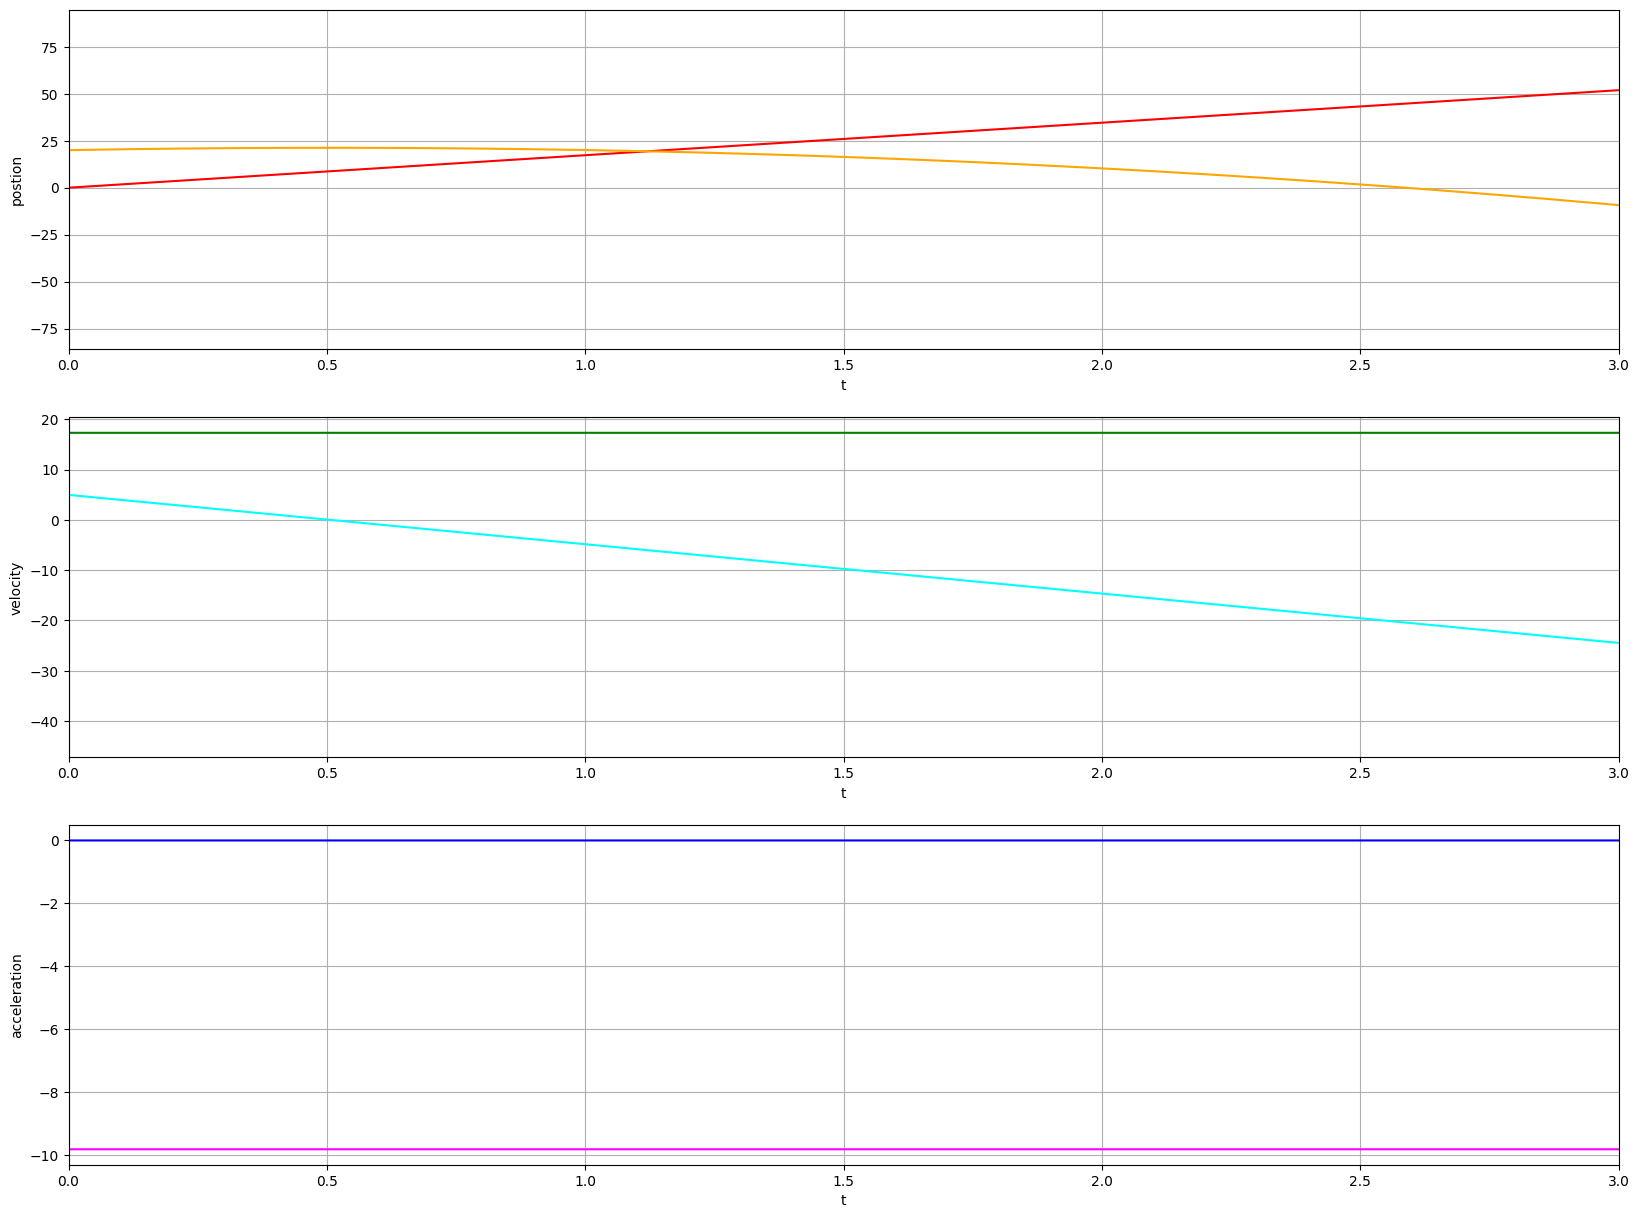

In [23]:
# It is a simple example of plotting. 
# Use the copy of it and change intelligently to plot what you want. 
# Sometimes just putting and deleting '#' character for deactivating or activating sepcific parts is enough

t_range=[0.0, 3.0]    # for a specific range. PLAY WITH END TIME!

# initialize plot routine
fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(311) 
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

# setting of horizontal axes
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel("t") # set the label
    ax.set_xlim(t_range) # set the min and max values; comment it out if neccessary
    ax.grid()    # draw a grey grid 

# content of graphs
ax1.set_ylabel("postion")
ax1.plot(t_tab, x_tab, color="red") # x(t) with red
ax1.plot(t_tab, y_tab, color="orange") # y(t) with orange
ax2.set_ylabel("velocity")
ax2.plot(t_tab, vx_tab, color="green") # vx(t) with green
ax2.plot(t_tab, vy_tab, color="cyan") # vy(t) with cyan
ax3.set_ylabel("acceleration")
ax3.plot(t_tab, ax_tab, color="blue") # ax(t) with blue
ax3.plot(t_tab, ay_tab, color="magenta") # ay(t) with magenta

# plt.savefig(....)

Find the time, when the body touched the ground on the graph!

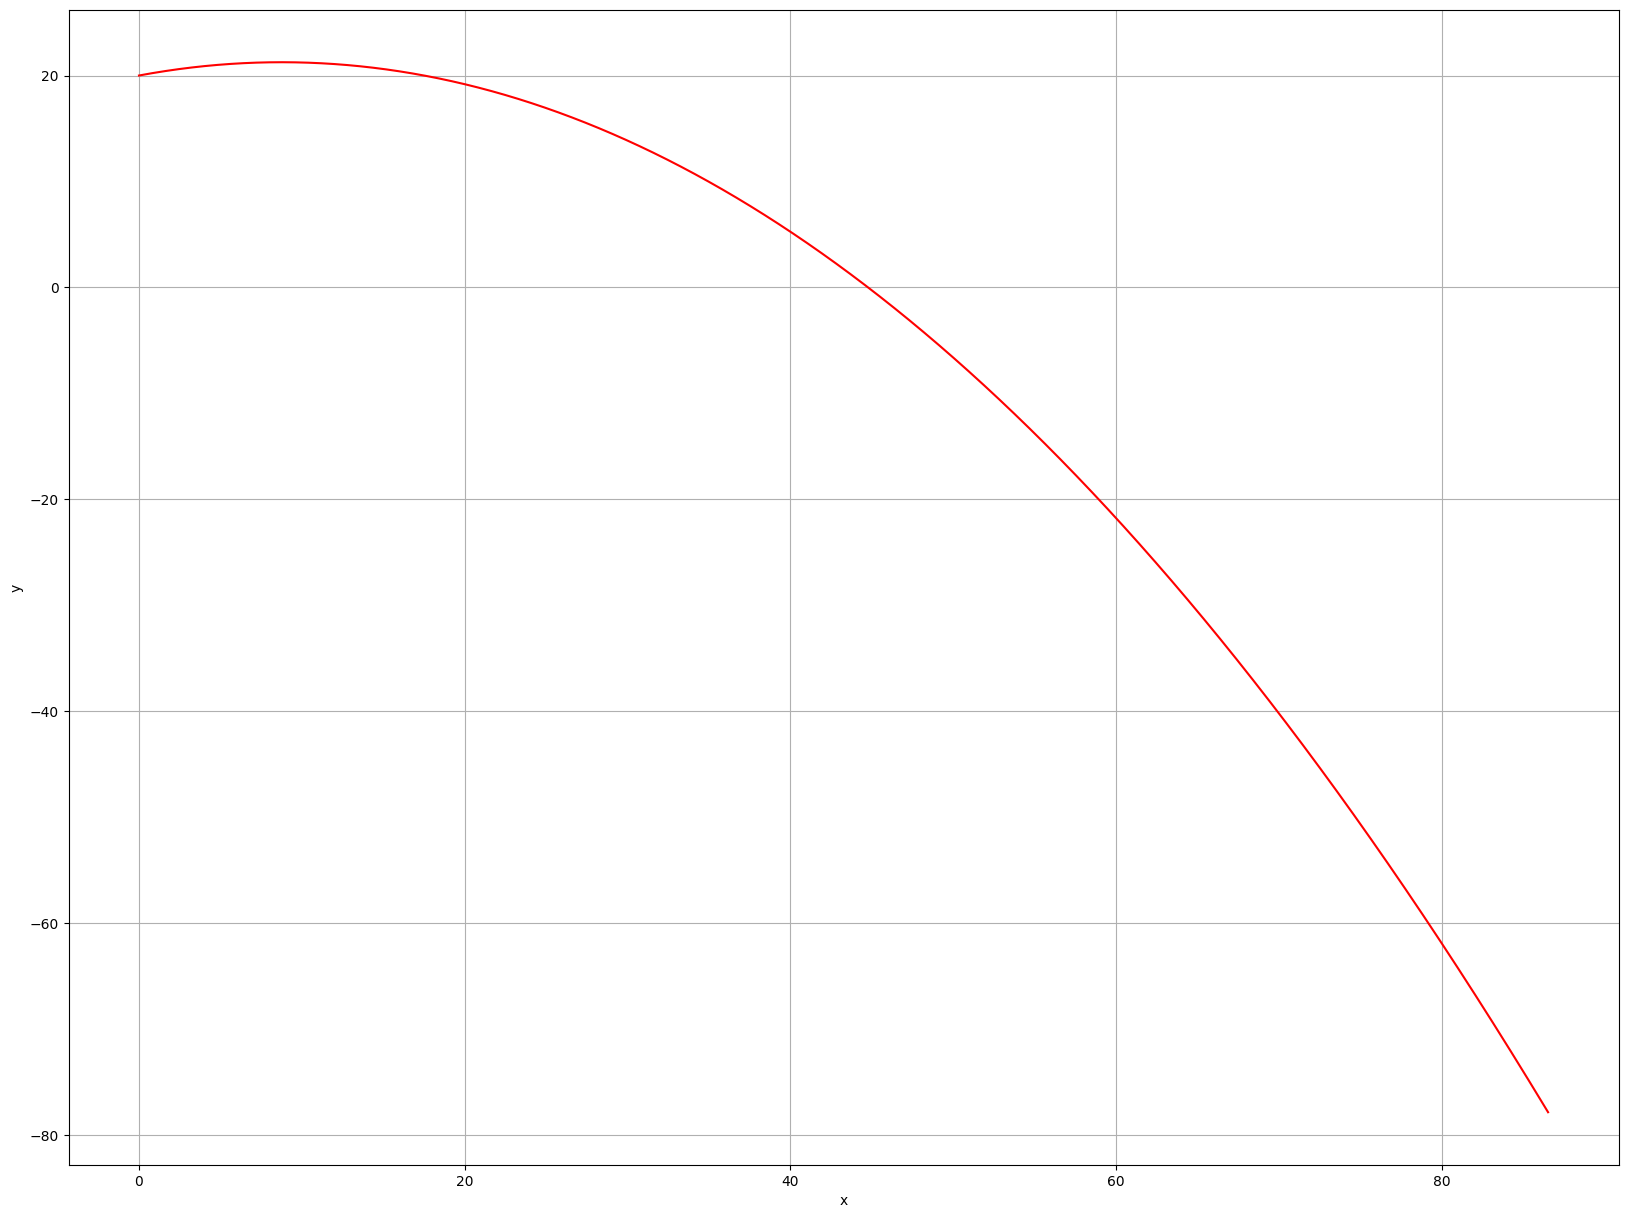

In [24]:
# Plot the path in x-y plane

fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x


## Where will the ball hit the ground?
## What will be the impact speed?
## How long did it take to reach the ground?

In [25]:
# find the meaning of "hit the ground:"
#  y=0 (in this coordinate system)

impact_ind=find_ind(y_tab, 0.0)

In [26]:
print("Number of solutions: %d"%len(impact_ind))

Number of solutions: 1


In [27]:
vabs_tab=calc_abs_2D(vx_tab, vy_tab)


for i in range(len(impact_ind)):
    print("Solution #: %d"%i)
    # impact position: x at impact (y=0)
    print("   x postion of the impact: %5.2f m"%x_tab[impact_ind[i]])
    # impact speed: vabs at impact 
    print("   speed     of the impact: %5.2f m/s"%vabs_tab[impact_ind[i]])
    # impact time: t at impact
    print("   time      of the impact: %5.2f s"%t_tab[impact_ind[i]])


Solution #: 0
   x postion of the impact: 44.76 m
   speed     of the impact: 26.76 m/s
   time      of the impact:  2.59 s


## What was the maximum height of this ball during the motion?

In [28]:
# maximum height = y has a maximum

maxheight_ind=find_max_ind(y_tab)

In [29]:
print("Maximum height: %5.2f m"%y_tab[maxheight_ind])

Maximum height: 21.25 m


In [30]:
# additional information:

print("Time    at maximum height: %5.2f s"%t_tab[maxheight_ind])
print("X-coord at maximum height: %5.2f m"%x_tab[maxheight_ind])
print("Speed   at maximum height: %5.2f m/s"%vabs_tab[maxheight_ind])

Time    at maximum height:  0.51 s
X-coord at maximum height:  8.76 m
Speed   at maximum height: 17.30 m/s


## What is the path length from the start to the impact?

In [31]:
# calculate distance covered:

dist_tab=calc_distance_covered_2D(x_tab, y_tab)

In [32]:
print("Path length to the impact: %5.2f m"%(dist_tab[impact_ind[0]]))

Path length to the impact: 52.03 m


## If there is another building at 25 m distance, where will the ball hit it?

In [33]:
# other building : x=25

In [34]:
otherbuilding_ind=find_ind(x_tab, 25.0)

print(otherbuilding_ind)

[1444]


In [35]:
# 1 solution! OK!

print("The ball will hit the other buildn at %5.2f m height."%(y_tab[otherbuilding_ind[0]]))

The ball will hit the other buildn at 16.94 m height.


# Other approach: start from acceleration

In [36]:
v0=18.0
alpha_deg=16.0
h=20.0

g=9.81
#------------
alpha=math.radians(alpha_deg)
vx0=v0*math.cos(alpha)
vy0=v0*math.sin(alpha)
x0=0.0
y0=h


# my ax(t) and ay(t) functions
def my_axt(t):
    return 0.0

def my_ayt(t):
    return -g


In [37]:
# Let's define the time values:
# Use t2, a2, ... to not overwirite the prevoius results

t2_tab=fill_list_series(0.0, 5.0, 0.001)  # fill_list_series : see in "Definitions" section
N=len(t2_tab) # Number of time values


# calculate accelerations
ax2_tab=calc_func_list(t_tab, my_axt)   # calc_func_list : see in "Definitions" section
ay2_tab=calc_func_list(t_tab, my_ayt) 

In [38]:
# a --> v --> x

vx2_tab=integral(t2_tab, ax2_tab, vx0)  # don't forget initial velocity!
vy2_tab=integral(t2_tab, ay2_tab, vy0)

x2_tab=integral(t2_tab, vx2_tab, x0)
y2_tab=integral(t2_tab, vy2_tab, y0)


In [39]:
# Theoretically x_tab = x2_tab, etc.

In [40]:
print(x_tab[100:110])
print(x2_tab[100:110])

[1.7302710526889742, 1.7475737632158639, 1.7648764737427536, 1.7821791842696433, 1.7994818947965332, 1.8167846053234227, 1.8340873158503124, 1.851390026377202, 1.868692736904092, 1.8859954474309817]
[1.7302710526889729, 1.7475737632158626, 1.7648764737427522, 1.782179184269642, 1.7994818947965316, 1.8167846053234211, 1.8340873158503108, 1.8513900263772005, 1.8686927369040902, 1.88599544743098]


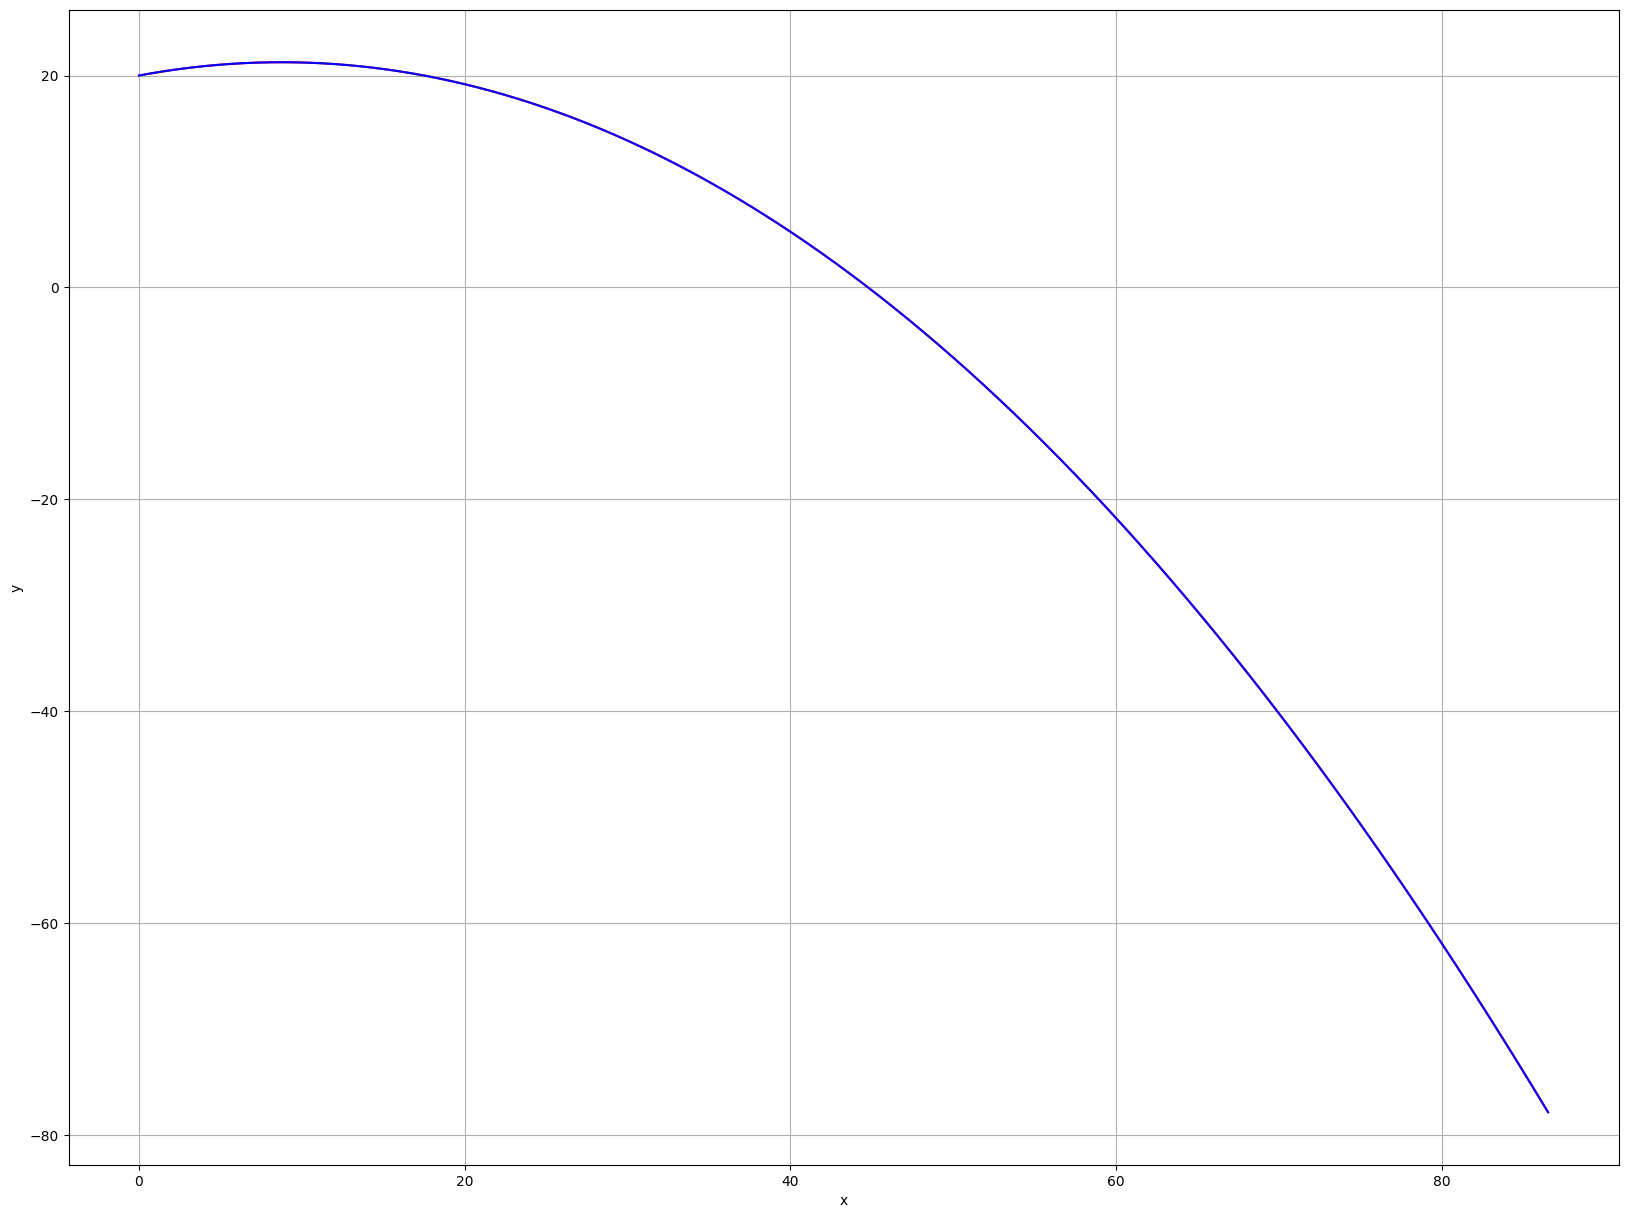

In [41]:
# Plot the two paths in x-y plane

fig=plt.figure(figsize=(20,15))  # plot size

# position of three sub-graphs
ax1=fig.add_subplot(111) 

ax1.set_xlabel("x") # set the label
ax1.set_ylabel("y") # set the label
ax1.grid()    # draw a grey grid 

# content of graphs

ax1.plot(x_tab, y_tab, color="red")   # plot y over x
ax1.plot(x2_tab, y2_tab, color="blue")   # plot y over x

In [42]:
# check the other problem solutions